In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import datetime as dt

# Load data
df = pd.read_excel("./Real estate valuation data set.xlsx")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [6]:
df.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
df.drop(columns=["No"], inplace=True)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [9]:
df["X1 transaction date"].nunique()

12

In [10]:
def convert_to_datetime(years):
    year = int(years)
    month = np.rint((years - year) * 12)
    base_date = pd.to_datetime(f"{year}")
    return base_date + pd.DateOffset(months=month)


df["X1 transaction date"] = df["X1 transaction date"].apply(convert_to_datetime)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013-07-01,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-11-01,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012-09-01,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013-04-01,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013-01-01,8.1,104.81010,5,24.96674,121.54067,52.5


In [11]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [12]:
df.duplicated().sum()

0

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\3756497322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=15)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

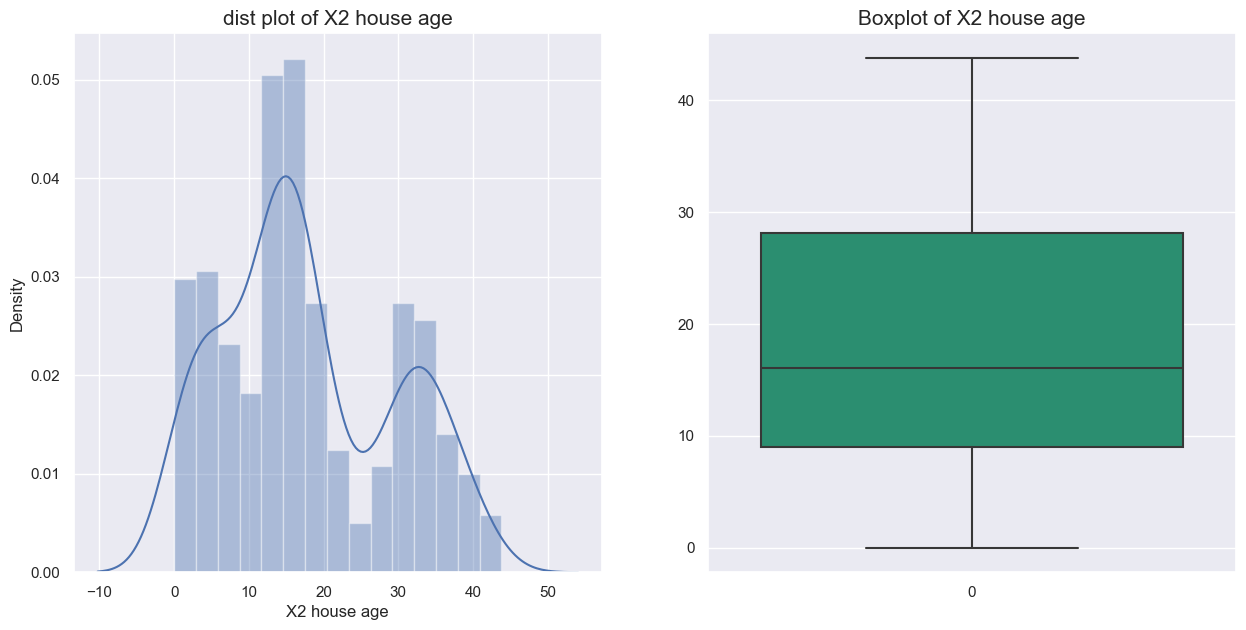

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\3756497322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=15)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

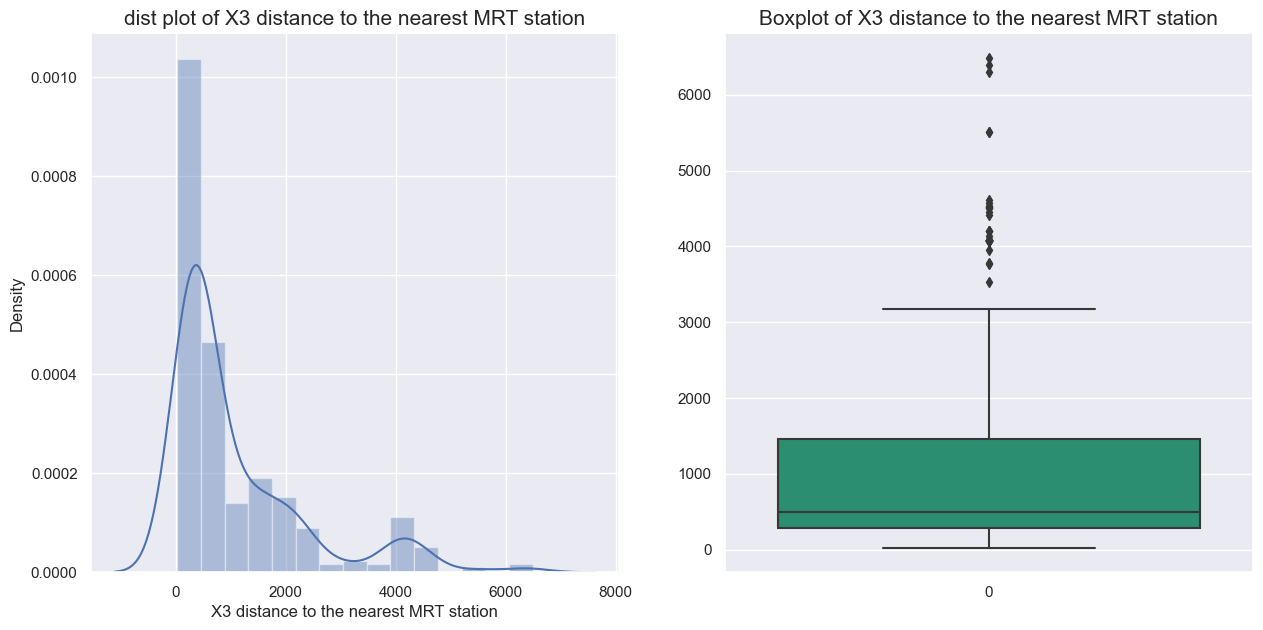

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\3756497322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=15)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

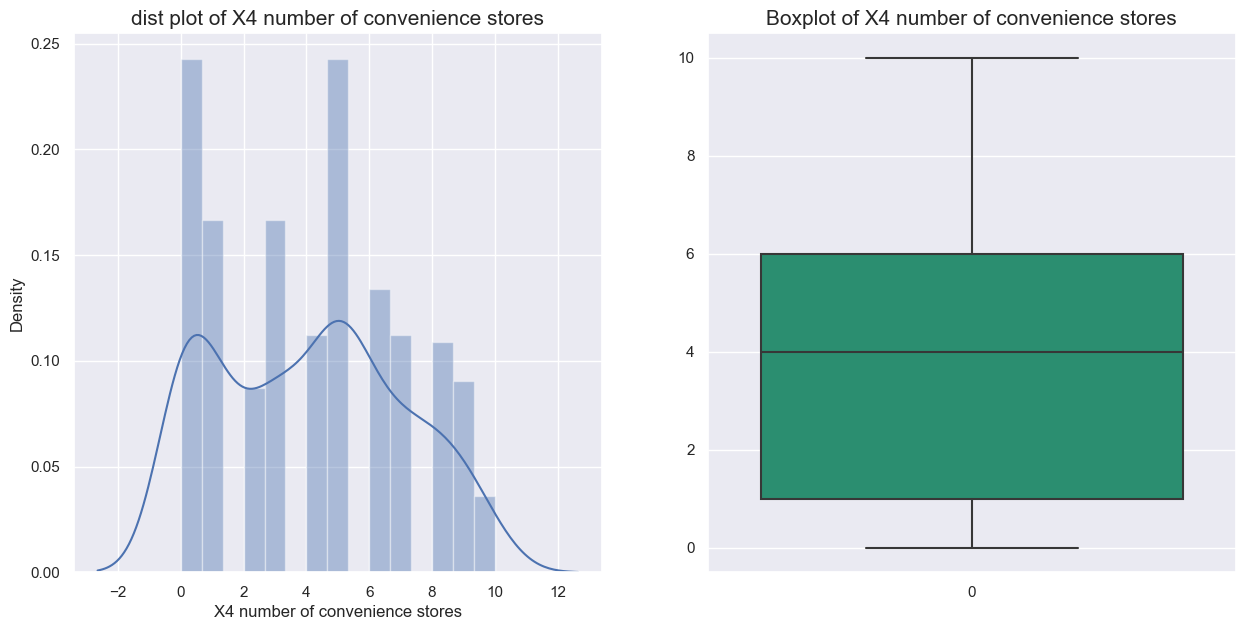

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\3756497322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=15)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

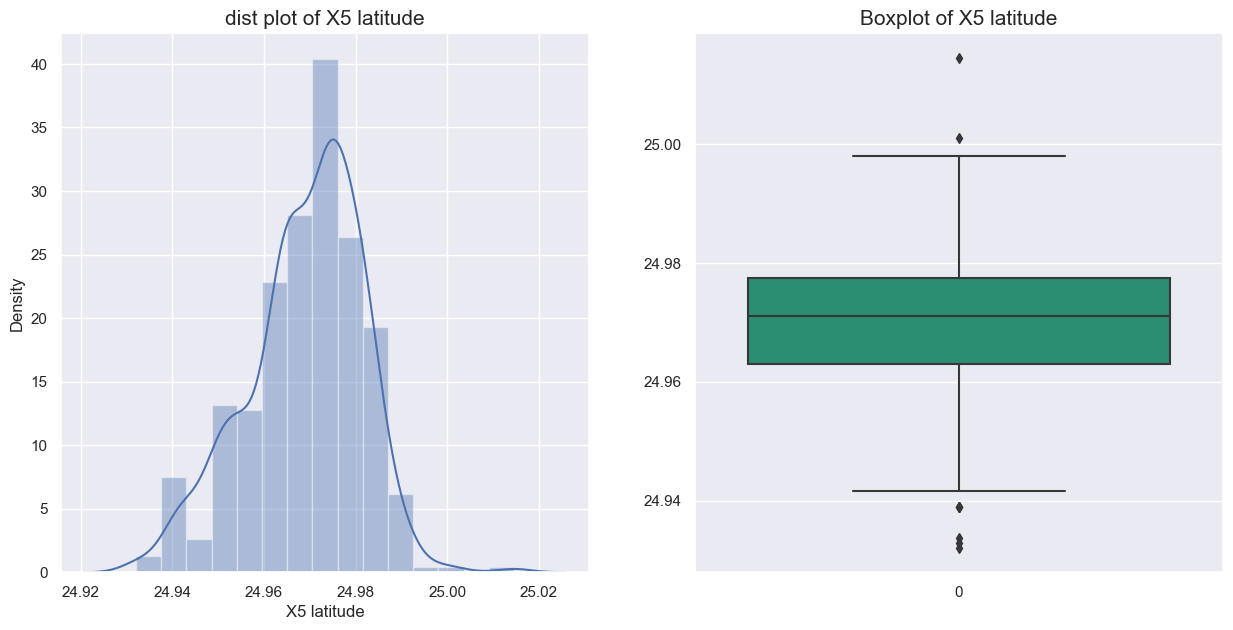

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\3756497322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=15)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

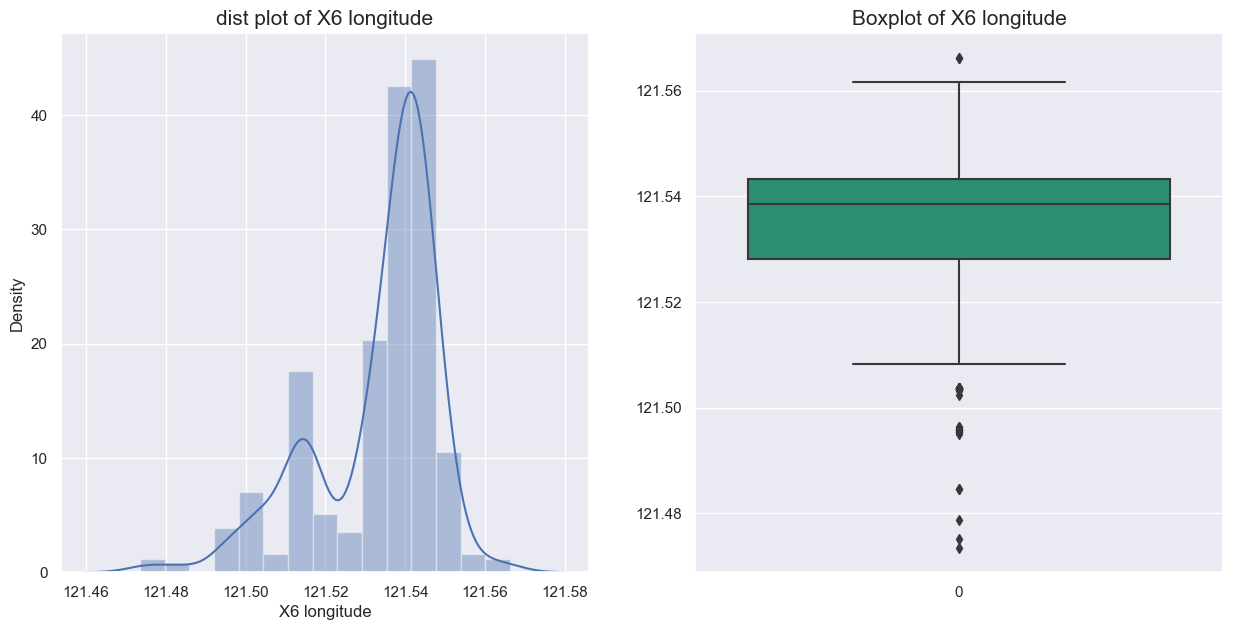

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\3756497322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=15)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

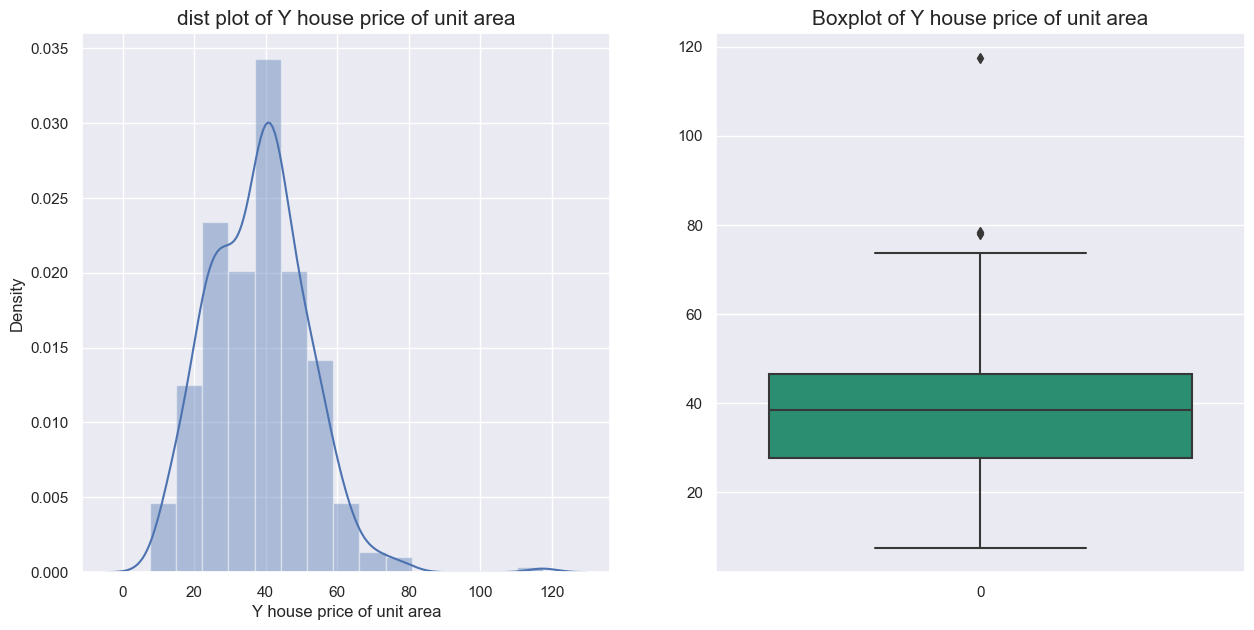

In [13]:
for column in df.select_dtypes(include="number").columns.tolist():
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.title("dist plot of " + column, fontsize=15)
    sns.distplot(df[column], bins=15)
    plt.subplot(1, 2, 2)
    plt.title("Boxplot of " + column, fontsize=15)
    sns.boxplot(data=df[column], palette="Dark2")
    plt.show()

In [14]:
df_capped = df.copy()

In [15]:
for column in df_capped.select_dtypes(include="number").columns.tolist():
    Q1 = df_capped[column].quantile(0.25)
    Q3 = df_capped[column].quantile(0.75)
    IQR = Q3 - Q1
    max_limit = Q3 + (1.5 * IQR)
    min_limit = Q1 - (1.5 * IQR)
    df_capped[column] = pd.DataFrame(
        np.where(
            df_capped[column] > max_limit,
            max_limit,
            (np.where(df_capped[column] < min_limit, min_limit, df_capped[column])),
        ),
        columns=[column],
    )

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\730944305.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column], bins=15)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

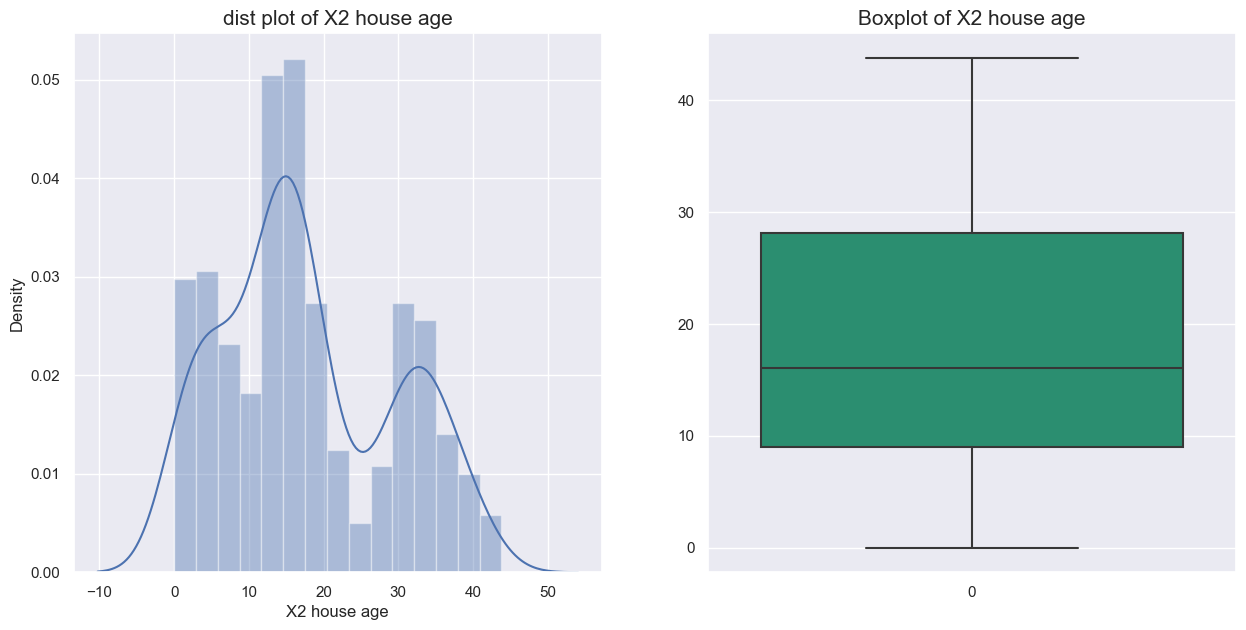

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\730944305.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column], bins=15)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

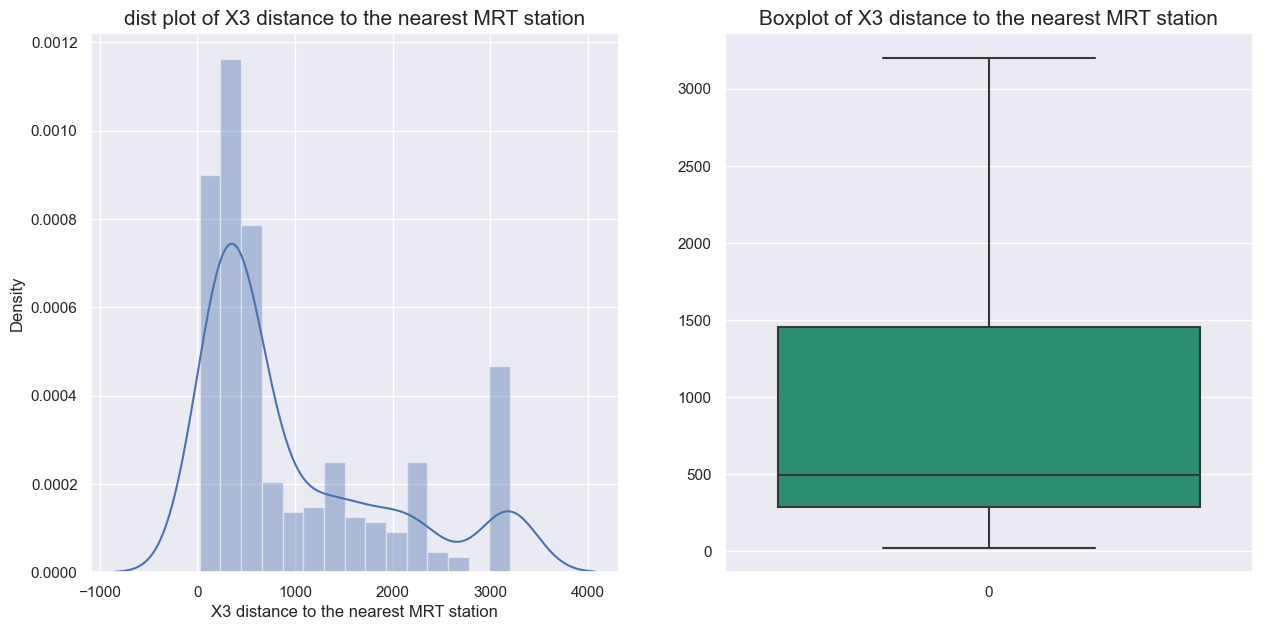

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\730944305.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column], bins=15)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

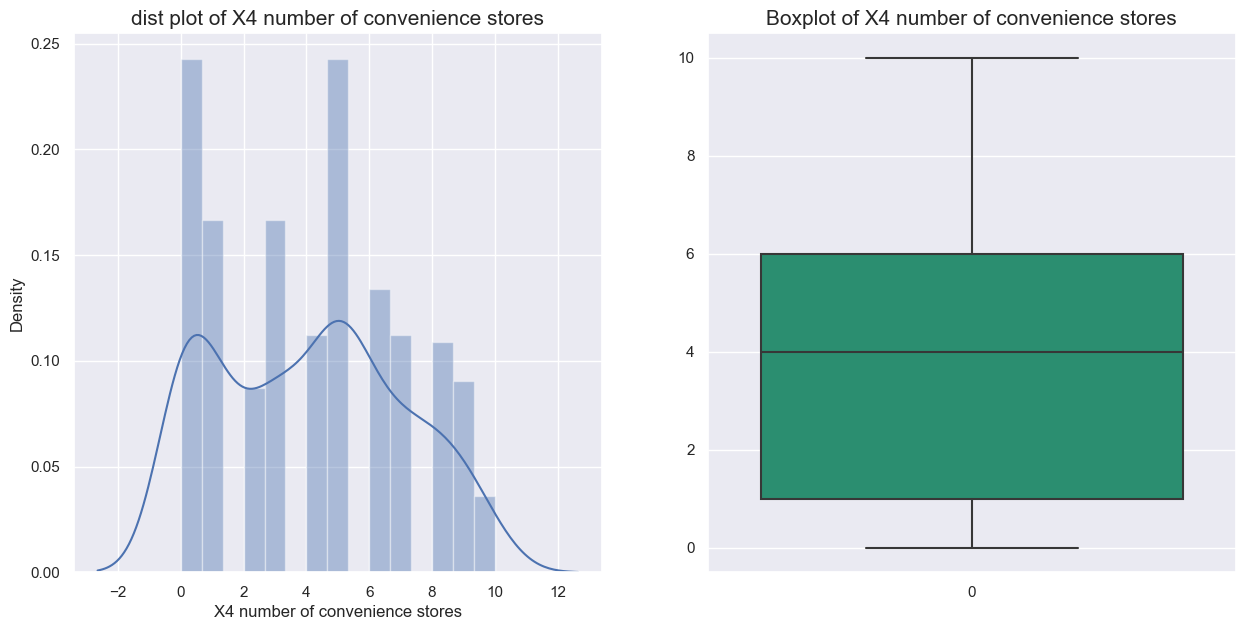

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\730944305.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column], bins=15)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

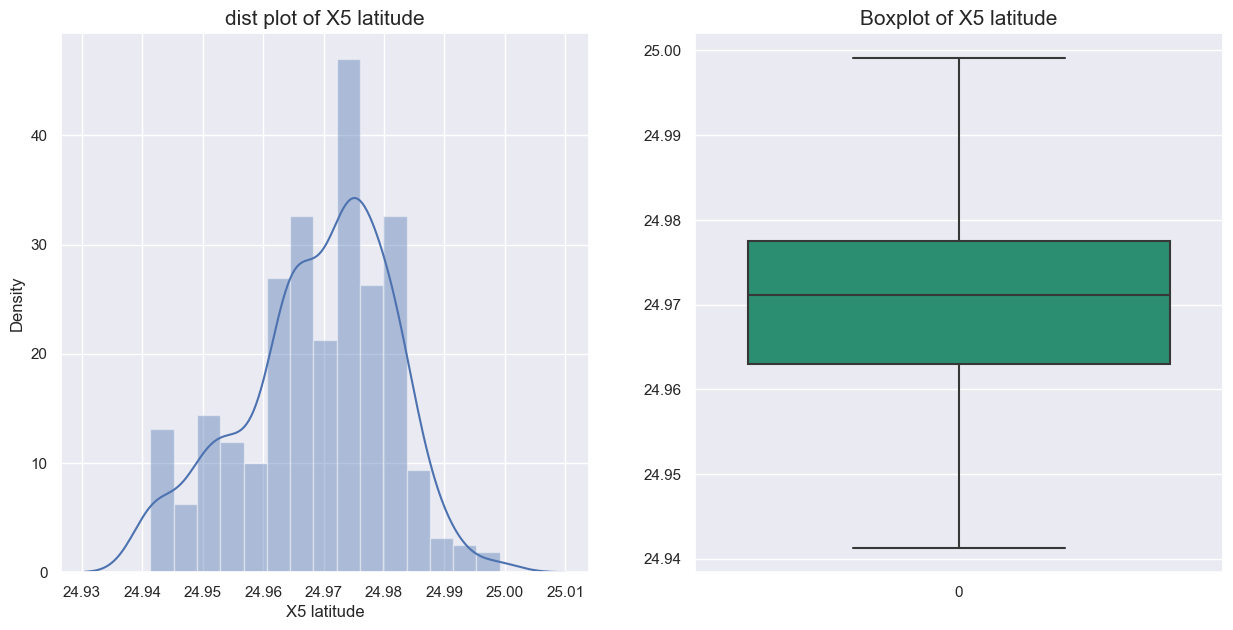

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\730944305.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column], bins=15)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

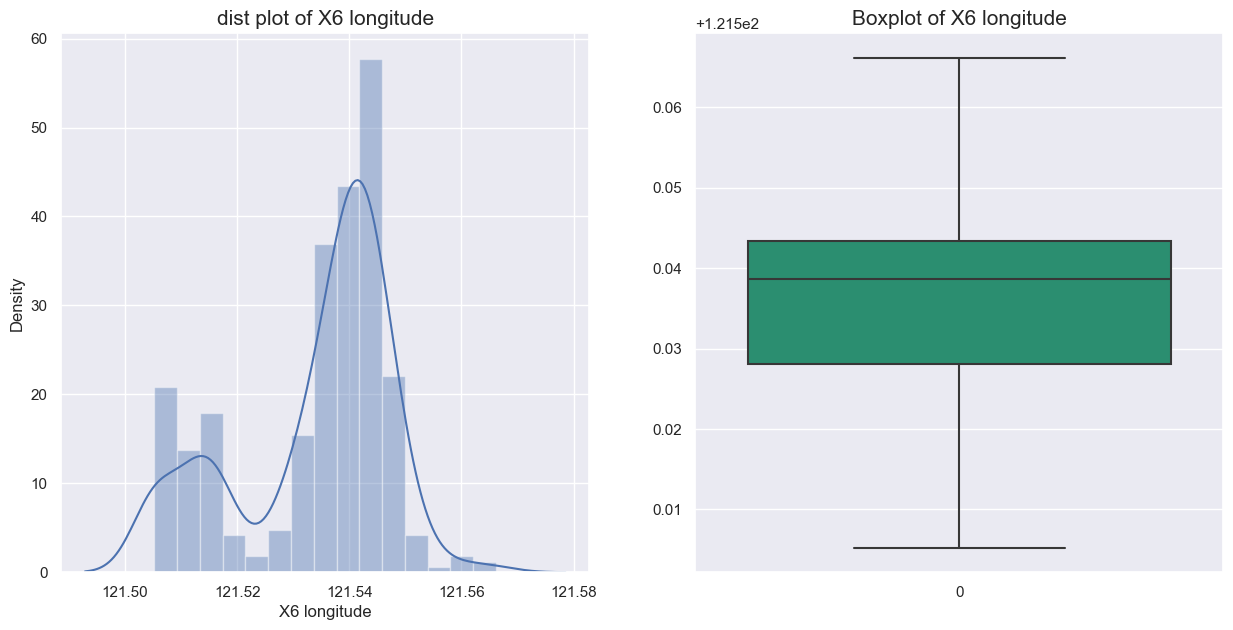

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\730944305.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column], bins=15)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

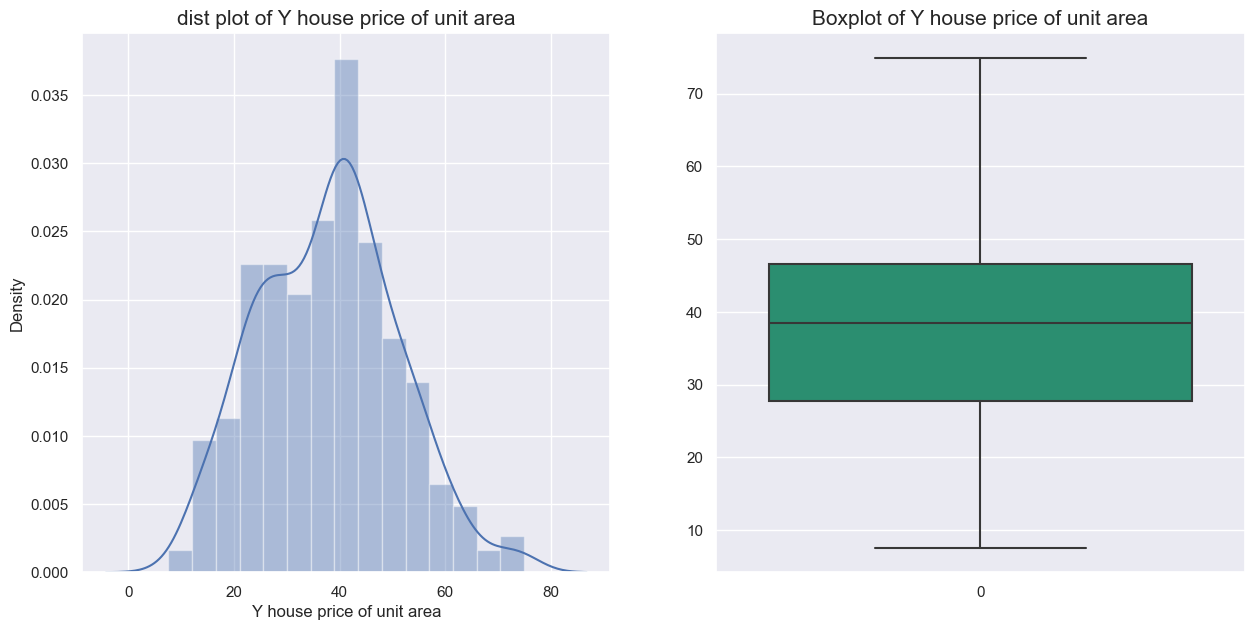

In [16]:
for column in df_capped.select_dtypes(include="number").columns.tolist():
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.title("dist plot of " + column, fontsize=15)
    sns.distplot(df_capped[column], bins=15)
    plt.subplot(1, 2, 2)
    plt.title("Boxplot of " + column, fontsize=15)
    sns.boxplot(data=df_capped[column], palette="Dark2")
    plt.show()

In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
X1 transaction date,414,2013-02-23 14:19:07.826086912,2012-09-01 00:00:00,2012-12-01 00:00:00,2013-03-01 00:00:00,2013-06-01 00:00:00,2013-08-01 00:00:00,NaN
X2 house age,414.0,17.71256,0.0,9.025,16.1,28.15,43.8,11.392485
X3 distance to the nearest MRT station,414.0,1083.885689,23.38284,289.3248,492.2313,1454.279,6488.021,1262.109595
X4 number of convenience stores,414.0,4.094203,0.0,1.0,4.0,6.0,10.0,2.945562
X5 latitude,414.0,24.96903,24.93207,24.963,24.9711,24.977455,25.01459,0.01241
X6 longitude,414.0,121.533361,121.47353,121.528085,121.53863,121.543305,121.56627,0.015347
Y house price of unit area,414.0,37.980193,7.6,27.7,38.45,46.6,117.5,13.606488


In [18]:
df_capped.describe().T

,count,mean,min,25%,50%,75%,max,std
X1 transaction date,414,2013-02-23 14:19:07.826086912,2012-09-01 00:00:00,2012-12-01 00:00:00,2013-03-01 00:00:00,2013-06-01 00:00:00,2013-08-01 00:00:00,NaN
X2 house age,414.0,17.71256,0.0,9.025,16.1,28.15,43.8,11.392485
X3 distance to the nearest MRT station,414.0,974.545851,23.38284,289.3248,492.2313,1454.279,3201.7103,968.915855
X4 number of convenience stores,414.0,4.094203,0.0,1.0,4.0,6.0,10.0,2.945562
X5 latitude,414.0,24.969067,24.941318,24.963,24.9711,24.977455,24.999137,0.01208
X6 longitude,414.0,121.533974,121.505255,121.528085,121.53863,121.543305,121.566135,0.013779
Y house price of unit area,414.0,37.861957,7.6,27.7,38.45,46.6,74.95,13.112035


In [19]:
df_capped["X1 transaction date"].value_counts()

X1 transaction date
2013-06-01    58
2013-07-01    47
2013-02-01    46
2012-12-01    38
2013-04-01    32
2012-11-01    31
2012-09-01    30
2013-05-01    29
2013-01-01    28
2012-10-01    27
2013-03-01    25
2013-08-01    23
Name: count, dtype: int64

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0, '')]

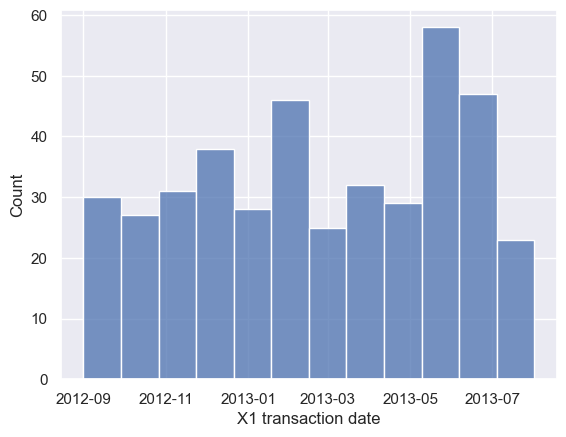

In [20]:
ax1 = sns.histplot(df_capped["X1 transaction date"], bins=12, kde=False)
ax1.bar_label(
    ax1.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

In [21]:
df_capped["X2 house age"].max()

43.8

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0, '')]

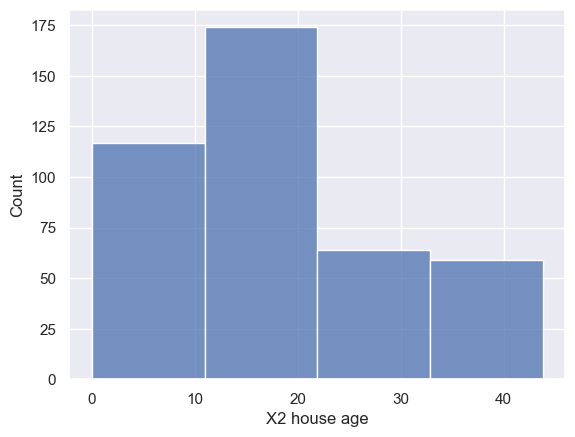

In [22]:
ax2 = sns.histplot(df_capped["X2 house age"], bins=4)
ax2.bar_label(
    ax2.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0, '')]

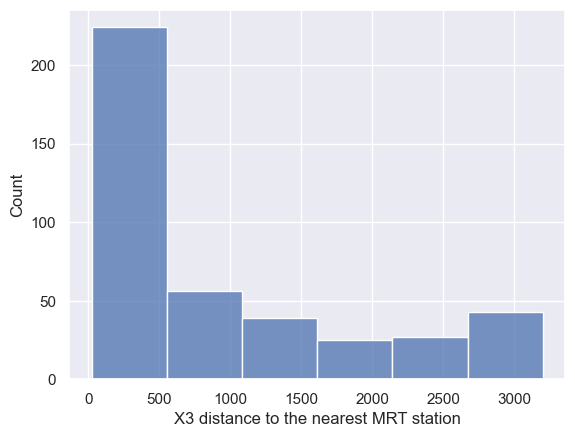

In [23]:
ax3 = sns.histplot(df_capped["X3 distance to the nearest MRT station"], bins=6)
ax3.bar_label(
    ax3.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0, '')]

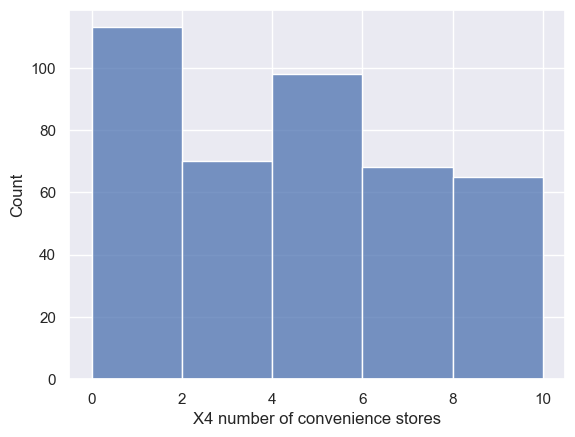

In [24]:
ax4 = sns.histplot(df_capped["X4 number of convenience stores"], bins=5)
ax4.bar_label(
    ax4.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0, '')]

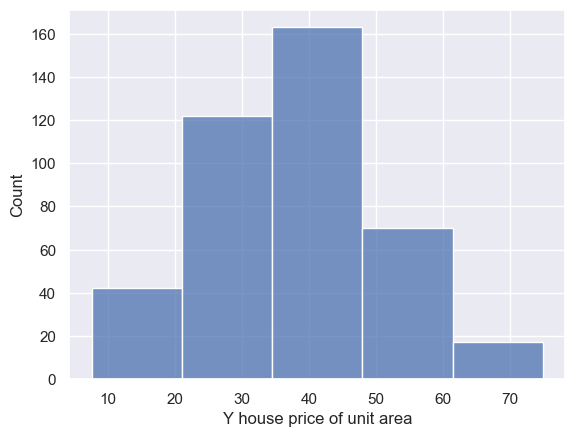

In [25]:
ay = sns.histplot(df_capped["Y house price of unit area"], bins=5)
ay.bar_label(
    ay.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

Text(0, 0.5, 'House Price of unit area')

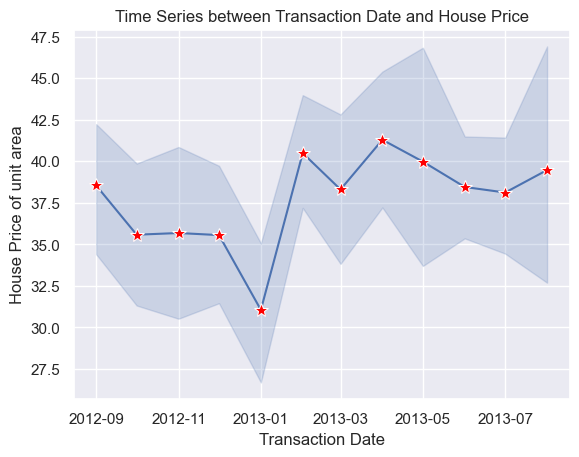

In [26]:
timeseres_x1_y = sns.lineplot(
    x=df_capped["X1 transaction date"],
    y=df_capped["Y house price of unit area"],
    marker="*",
    markerfacecolor="Red",
    markersize=10,
)
timeseres_x1_y.set_title(label="Time Series between Transaction Date and House Price")
timeseres_x1_y.set_xlabel(xlabel="Transaction Date")
timeseres_x1_y.set_ylabel(ylabel="House Price of unit area")

In [27]:
df_capped[["X1 transaction date"]] = df_capped[["X1 transaction date"]].astype(
    "category"
)

In [28]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   X1 transaction date                     414 non-null    category
 1   X2 house age                            414 non-null    float64 
 2   X3 distance to the nearest MRT station  414 non-null    float64 
 3   X4 number of convenience stores         414 non-null    float64 
 4   X5 latitude                             414 non-null    float64 
 5   X6 longitude                            414 non-null    float64 
 6   Y house price of unit area              414 non-null    float64 
dtypes: category(1), float64(6)
memory usage: 20.3 KB


In [30]:
# sns.countplot(df_capped["X1 transaction date"])

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

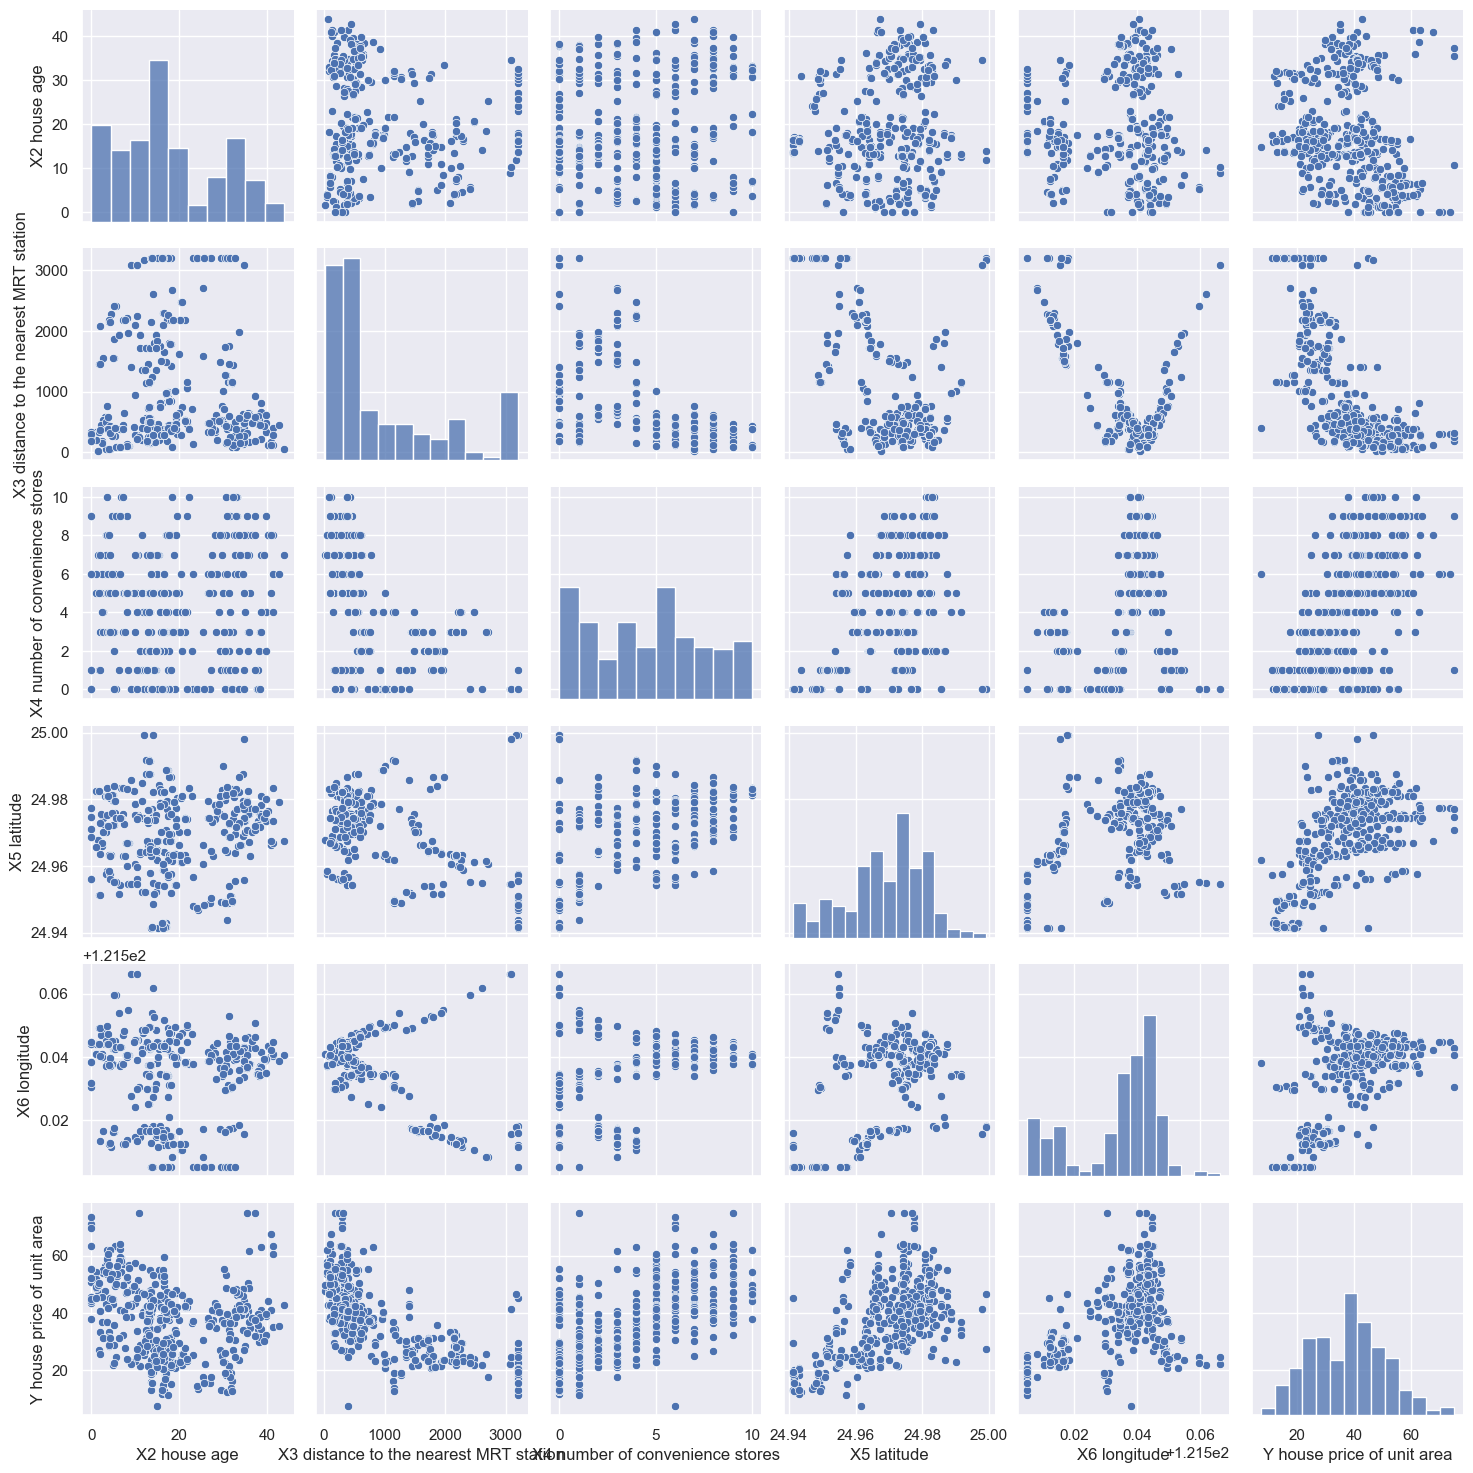

In [31]:
sns.pairplot(df_capped)

<Axes: >

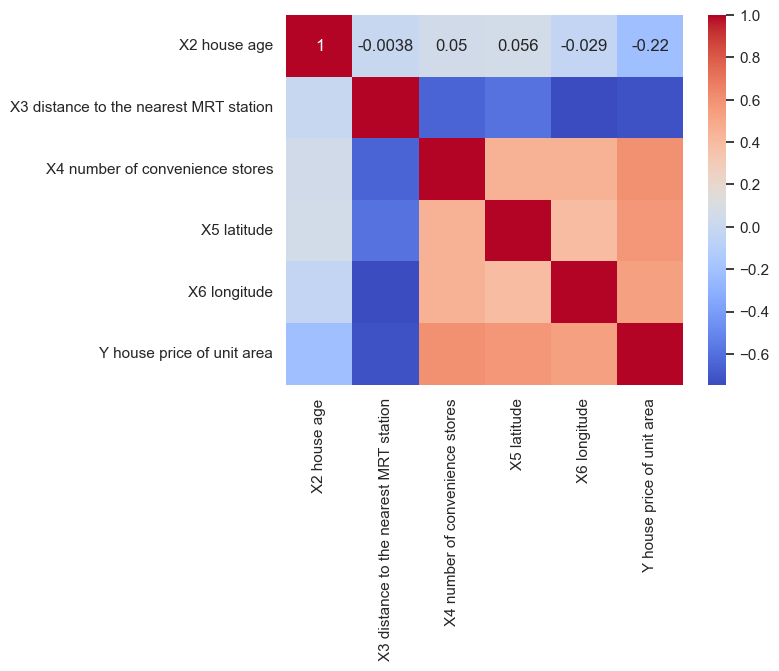

In [32]:
cr = df_capped.corr(numeric_only=True)
sns.heatmap(cr, annot=True, cmap="coolwarm")

In [33]:
df_capped.drop(columns=["X2 house age", "X6 longitude"], inplace=True)

In [34]:
df_capped.head(5)

,X1 transaction date,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,Y house price of unit area
0,2012-12-01,84.87882,10.0,24.98298,37.9
1,2012-12-01,306.59470,9.0,24.98034,42.2
2,2013-08-01,561.98450,5.0,24.98746,47.3
3,2013-07-01,561.98450,5.0,24.98746,54.8
4,2012-11-01,390.56840,5.0,24.97937,43.1


In [35]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

data_x = df_capped.iloc[:, 1:-1]
data_y = df_capped.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.2, random_state=21, shuffle=True
)
LR = linear_model.LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [36]:
import statsmodels.api as sm

LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
y_train_pred = LR.predict(x_train)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.606
Model:                                    OLS   Adj. R-squared:                  0.602
Method:                         Least Squares   F-statistic:                     167.4
Date:                        Sat, 13 Jan 2024   Prob (F-statistic):           9.63e-66
Time:                                08:35:01   Log-Likelihood:                -1155.6
No. Observations:                         331   AIC:                             2319.
Df Residuals:                             327   BIC:                             2334.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [37]:
x_test = sm.add_constant(x_test)
model1 = sm.OLS(y_test, x_test).fit()
print(model1.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.533
Model:                                    OLS   Adj. R-squared:                  0.515
Method:                         Least Squares   F-statistic:                     30.00
Date:                        Sat, 13 Jan 2024   Prob (F-statistic):           4.76e-13
Time:                                08:35:01   Log-Likelihood:                -309.59
No. Observations:                          83   AIC:                             627.2
Df Residuals:                              79   BIC:                             636.9
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [43]:
rmse = np.sqrt(MSE(y_train, y_train_pred))
print("RMSE : % f" % (rmse))

RMSE :  7.942543


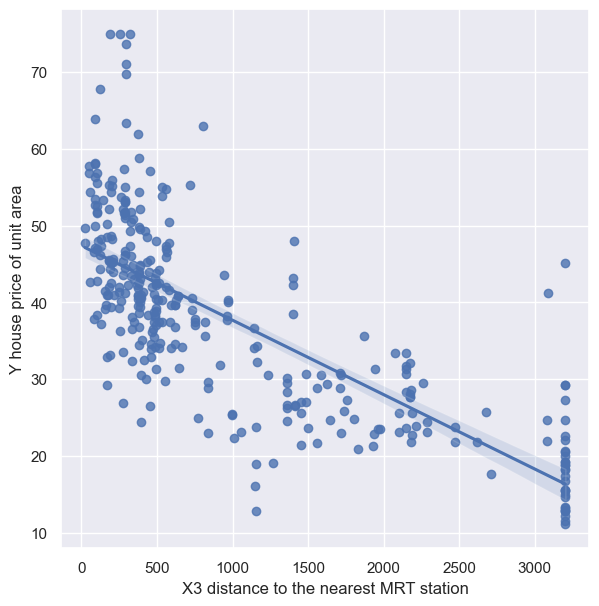

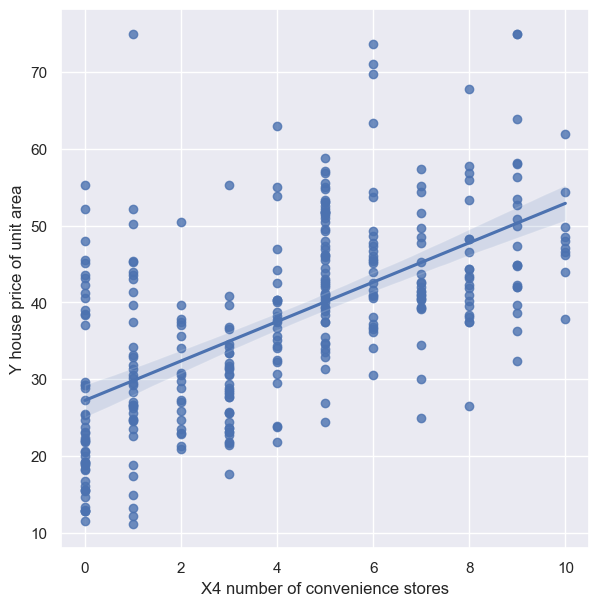

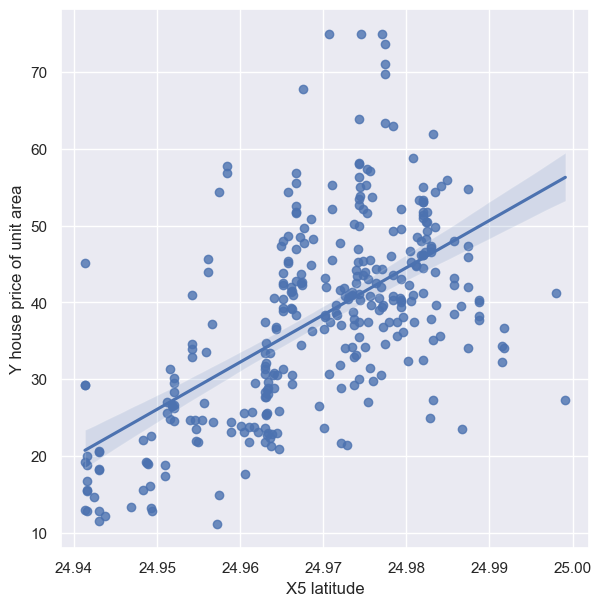

In [39]:
for column in data_x.select_dtypes(include="number").columns.tolist():
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    sns.regplot(x=x_train[column], y=y_train)
    plt.show()

In [40]:
LR.intercept_

-5224.121948036271

In [41]:
LR.coef_

array([-6.60125985e-03,  7.43127391e-01,  2.10875513e+02])

# XG boost

XGboost builds cycles that repeatedly builds new models and combines them into an ensemble model. It is started by calculating the errors for each observation in the dataset. And build model to predict those. Add the predictions of error into the ensemble model.

In [42]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import asarray

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# train_dmatrix = xg.DMatrix(data = x_train, label = y_train) 
# test_dmatrix = xg.DMatrix(data = x_test, label = y_test) 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.2, random_state=21, shuffle=True
)

In [ ]:
xgb_r = xg.XGBRegressor(
    objective="reg:linear",
    n_estimators=1000,
    learning_rate=0.01,
    n_jobs=4,
    seed=123,
    eval_metric="rmse",
    # early_stopping_rounds=10,
    max_depth=7,
    subsample=0.7,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=1,
    reg_lambda=1,
    # booster="gblinear",
    # num_boost_round=10,
)

In [ ]:
dir(xgb_r)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_can_use_inplace_predict',
 '_check_feature_names',
 '_check_n_features',
 '_configure_fit',
 '_create_dmatrix',
 '_estimator_type',
 '_get_default_requests',
 '_get_iteration_range',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_load_model_attributes',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',
 '_validate_data',
 '_validate_params',
 'apply',
 'base_score',
 'best_iteration',
 'best_score',
 'booster

In [ ]:
xgb_r.fit(
    x_train,
    y_train,
    eval_set=[(x_test, y_test)],
    verbose=False,
)

c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:40:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=4,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
pred = xgb_r.predict(x_test)

In [ ]:
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" % (rmse))

RMSE :  7.097003


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=21)
scores = cross_val_score(
    xgb_r, data_x, data_y, scoring="neg_root_mean_squared_error", cv=cv,verbose=False
)
scores = absolute(scores)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:40:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:40:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:40:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\r

Mean RMSE: 6.983 (1.043)


In [ ]:
row = [500,3,25]
new_data = asarray([row])
y_hat = xgb_r.predict(new_data)
print('Predicted: %.2f' % y_hat)

Predicted: 35.17


C:\Users\Hort\AppData\Local\Temp\ipykernel_17128\3646680542.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.2f' % y_hat)


In [ ]:
row = [100,5,24.983]
new_data = asarray([row])
y_hat = xgb_r.predict(new_data)
print('Predicted: %.2f' % y_hat)

Predicted: 48.33


C:\Users\Hort\AppData\Local\Temp\ipykernel_17128\2307871140.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.2f' % y_hat)


In [ ]:
from xgboost import cv

data_dmatrix = xg.DMatrix(data=data_x, label=data_y)
params = {
    "objective": "reg:linear",
    "colsample_bytree": 0.3,
    "learning_rate": 0.1,
    "max_depth": 5,
    "alpha": 10,
}

xgb_cv = cv(
    dtrain=data_dmatrix,
    params=params,
    nfold=3,
    num_boost_round=50,
    early_stopping_rounds=10,
    metrics="rmse",
    as_pandas=True,
    seed=123,
)

c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:43:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
xgb_cv.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,13.002270,0.266062,13.030084,0.522346
1,12.950706,0.267642,12.980172,0.524669
2,12.866364,0.265373,12.900466,0.525682
3,12.783085,0.263119,12.821815,0.526747
4,12.700843,0.260870,12.744270,0.527827


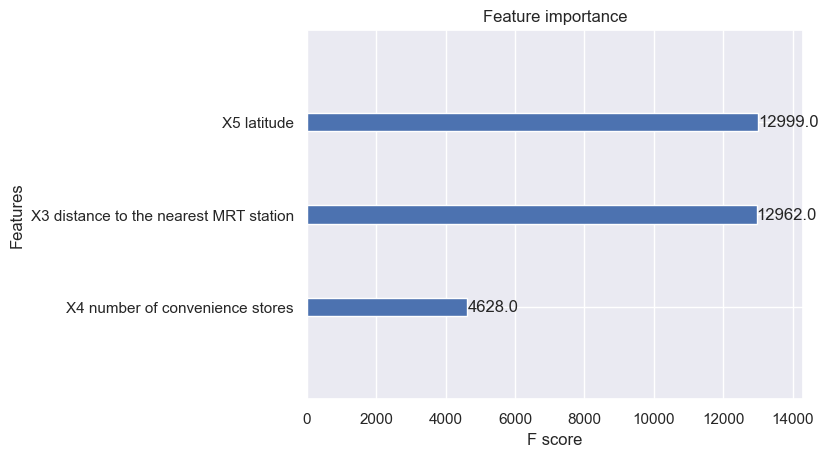

<Figure size 1600x1200 with 0 Axes>

In [ ]:
xg.plot_importance(xgb_r)
plt.figure(figsize = (16, 12))
plt.show()